<a href="https://colab.research.google.com/github/andydaehn/Drug_Classification/blob/main/Drug_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Classification Analysis

This analysis will help predict the best drug to use for a particular patient, based on medical data from 200 patients, by classifying the patient to the drug profile.

# Run the following cell, restart the kernal, and then import libraries.

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (21.8 MB)


# Import Libraries

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display # Allows the use of display() for DataFrames
from pandas_profiling import ProfileReport

from IPython.display import JSON
from google.colab import output
from subprocess import getoutput
import os




# Pretty display for notebooks
%matplotlib inline
# Load the dataset
feat_df = pd.read_csv('drug200.csv')



# Exploratory Data Analysis

In [3]:
profile = ProfileReport(feat_df, title='Drug Classification', html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Analysis of numerical features

In [4]:
# Combine all numerical features
numerical_cols = feat_df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['Age', 'Na_to_K']

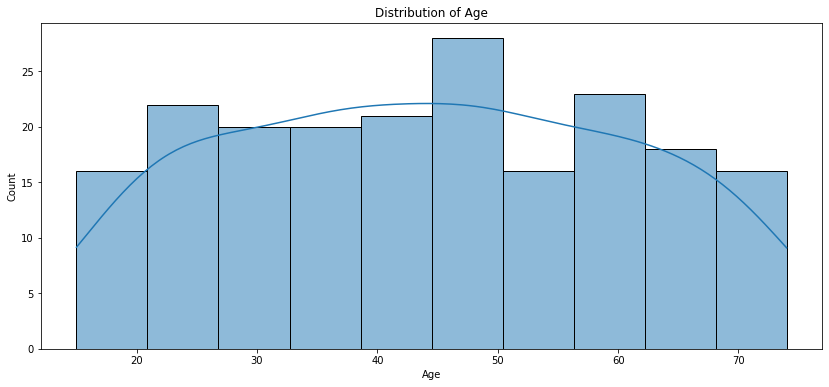

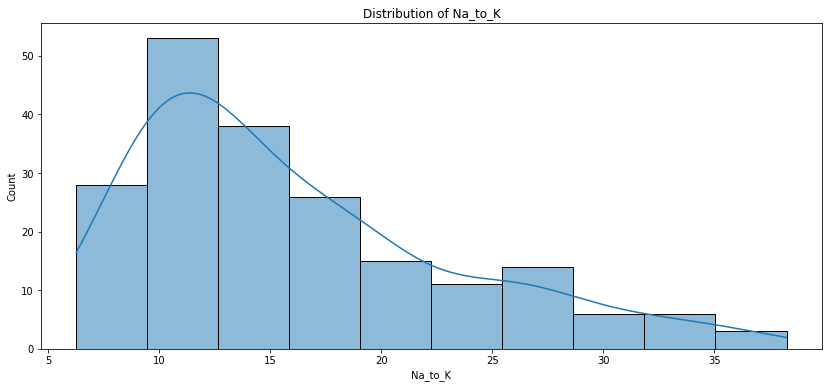

In [5]:
# Plot numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.histplot(data=feat_df,x=col,bins=10,kde=True,palette = 'deep')
    plt.title(f"Distribution of {col}")

Check skewness and kurtosis of Na_to_K

In [6]:

# Skewness and kurtosis
print("Skewness: %f" % feat_df['Na_to_K'].skew())
print("Kurtosis: %f" % feat_df['Na_to_K'].kurt())

Skewness: 1.039341
Kurtosis: 0.379979


#Na_to_k has a positive skew with many outliers on the tail

#Use log1p to manage the outliers

In [7]:
# Use log1p to adjust the skewness and kurtosis
feat_df['Na_to_K'] = np.log1p(feat_df['Na_to_K'])

# Skewness and kurtosis
print("Skewness: %f" % feat_df['Na_to_K'].skew())
print("Kurtosis: %f" % feat_df['Na_to_K'].kurt())

Skewness: 0.350931
Kurtosis: -0.711525


In [8]:
##Analysis of Categorical features

In [9]:
# Combine all categorical features
categorical_cols=feat_df.select_dtypes(include=object).columns.to_list()
categorical_cols

['Sex', 'BP', 'Cholesterol', 'Drug']

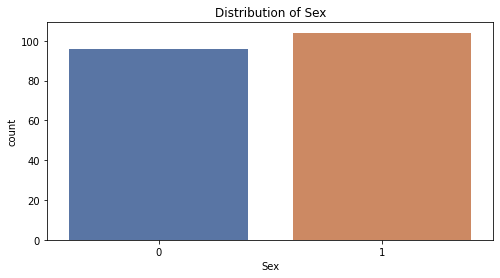

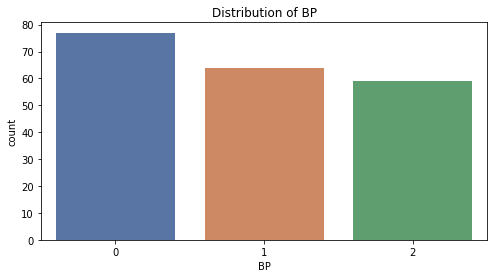

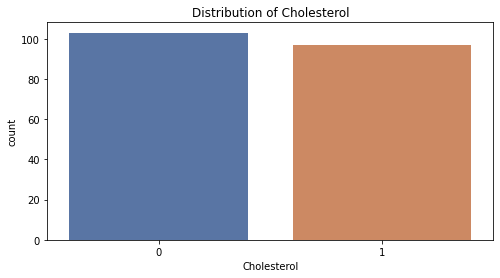

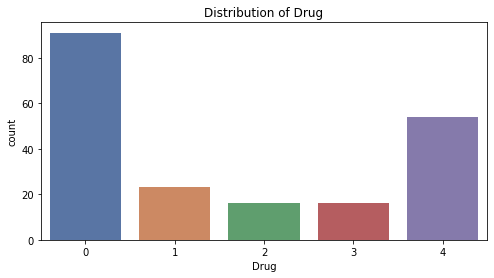

In [20]:
# Plot categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=feat_df,x=col,palette = 'deep')
    plt.title(f"Distribution of {col}")

Drug Y is widely used compared to other drugs, assign class weights to balance this situation.

Bivariate Analysis

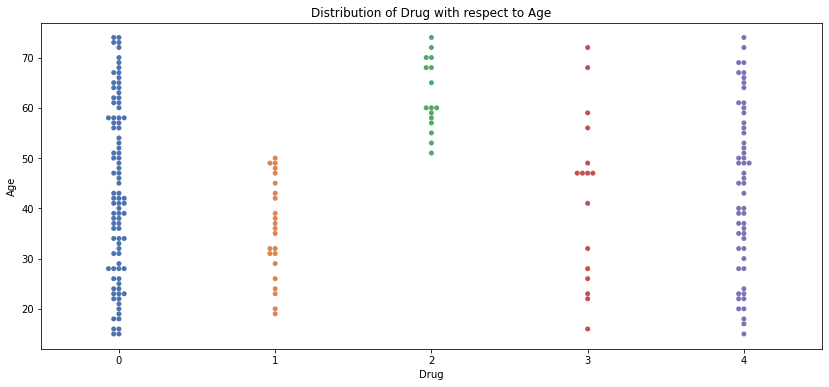

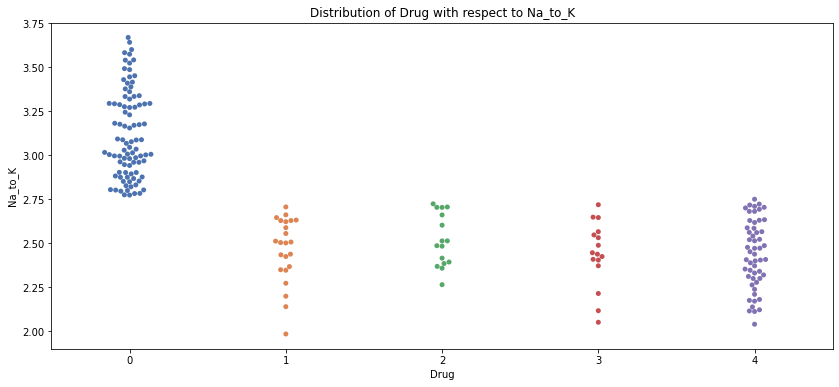

In [21]:
# Bivariate for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.swarmplot(data=feat_df,x='Drug',y=col,palette = 'deep')
    plt.title(f"Distribution of Drug with respect to {col}")

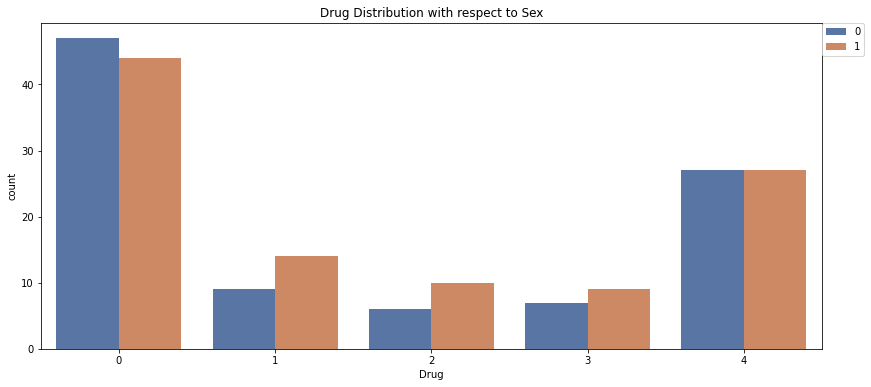

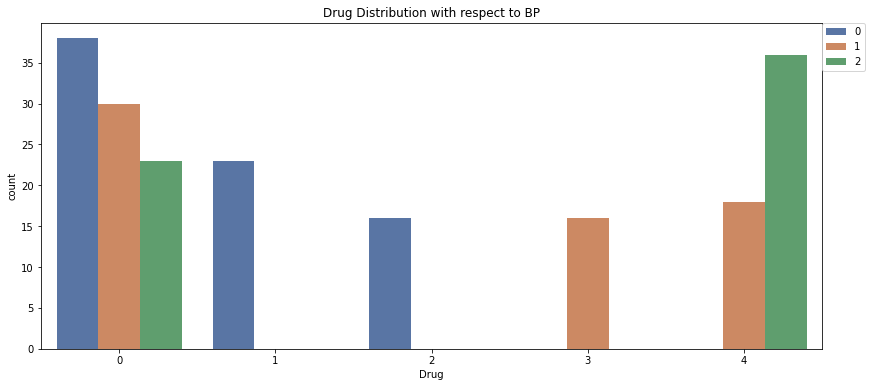

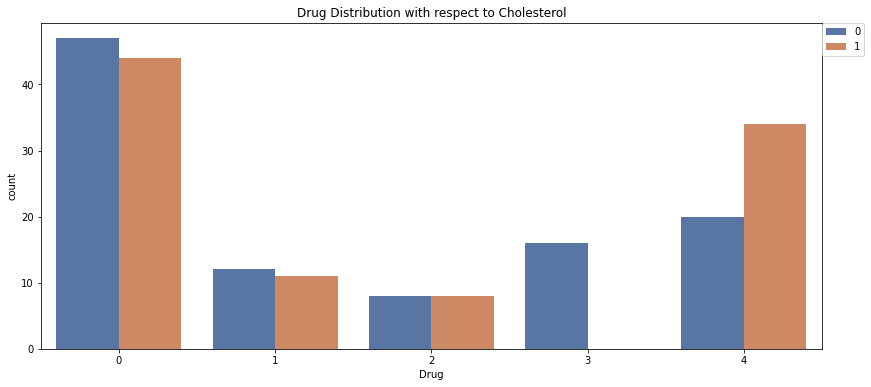

In [24]:
# Bivariate for categorical columns
for col in categorical_cols:
    if col=='Drug':
        continue   
    plt.figure(figsize=(14,6))
    sns.countplot(data=feat_df,x='Drug',hue=col,palette='deep')
    plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left',borderaxespad=0)
    plt.title(f"Drug Distribution with respect to {col}")

# Encode categorical values

In [13]:
# Split dataframe into features and labels
y_df = feat_df[['Drug']]
X_df = feat_df.drop(columns=['Drug'])


In [14]:


# def label_encoder(x):
#     le = LabelEncoder()
#     drug[x] = le.fit_transform(drug[x])
# categ = ["Sex","BP","Cholesterol","Drug"]

# for l in categ:
#     label_encoder(l)

#X_df = LabelEncoder.fit_transform(X_df)

# # Encoding
# for col in categorical_cols:
#     feat_df[col] = feat_df[col].astype('category').cat.codes

one_hot_encoded_data = pd.get_dummies(X_df, columns = X_df.columns)


In [15]:

X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data, y_df, test_size=0.2, random_state=42)

In [16]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
#y_pred = DTC.predict(X_test)
# Making predictions
y_train_pred = DTC.predict(X_train)
y_test_pred = DTC.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print('The training accuracy is', (train_accuracy*100),'%')
print('The test accuracy is', (test_accuracy*100),'%')



The training accuracy is 100.0 %
The test accuracy is 50.0 %


In [17]:
# Split dataframe into features and labels
y_df = feat_df[['Drug']]
X_df = feat_df.drop(columns=['Drug'])
# Change the encoding
# Encoding
for col in categorical_cols:
    feat_df[col] = feat_df[col].astype('category').cat.codes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [19]:
#DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
#y_pred = DTC.predict(X_test)
# Making predictions
y_train_pred = DTC.predict(X_train)
y_test_pred = DTC.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print('The training accuracy is', (train_accuracy*100),'%')
print('The test accuracy is', (test_accuracy*100),'%')

ValueError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [ ]:
RF = RandomForestClassifier
RF.fit(X_train,y_train)
#y_pred = DTC.predict(X_test)
# Making predictions
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print('The training accuracy is', (train_accuracy*100),'%')
print('The test accuracy is', (test_accuracy*100),'%')


In [ ]:
# Show one hot encoding first and then show the log1p

In [ ]:
# Plot the import features
feature_importances = pd.DataFrame(DTC.feature_importances_,index=X_df.columns.to_list(),columns=['Importance']).sort_values(by='Importance',ascending=True)
feature_importances.plot(kind='barh',figsize=(14,6));
plt.title("Feature Importance",fontsize=20);